In [1]:
from restaurant_data_api import RestaurantDataAPI
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

### Analyzing the Distribution of Restaurants Across Boroughs



The visualization shows a bar chart comparing the number of restaurants across different boroughs, with each bar representing a borough and its corresponding count of restaurants. It highlights the distribution and density of restaurants, indicating which boroughs have the highest and lowest concentrations of dining options.

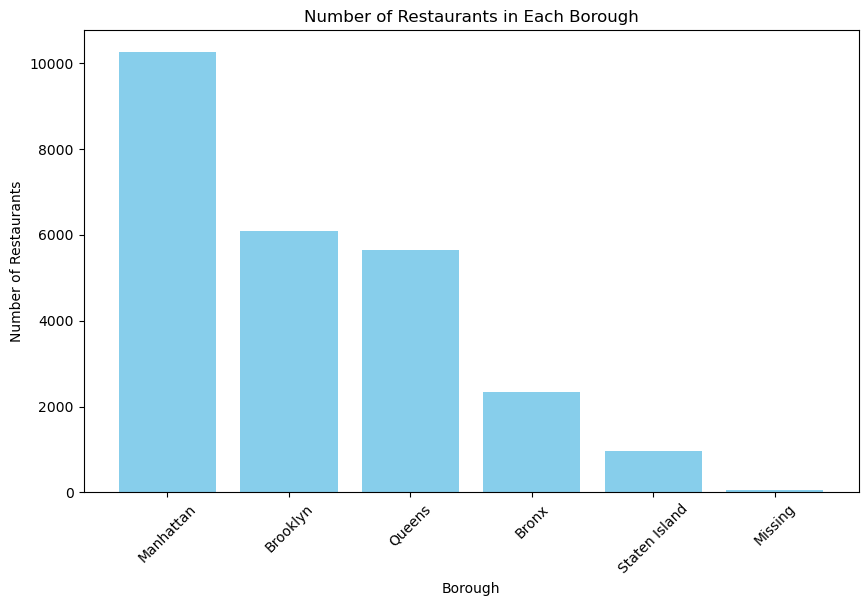

In [2]:
def visualize_restaurants_in_each_borough(api):
    '''
    Visualizes the distribution of restaurants across different boroughs using a bar chart, sorted by the number of restaurants.

    This function queries the database for the count of restaurants in each borough, sorts these counts in descending order,
    and then generates a bar chart to visualize these counts. The bar chart provides a clear graphical representation
    of which boroughs have the highest concentration of restaurants.

    Parameters:
    - api (RestaurantDataAPI): An instance of the RestaurantDataAPI class used to perform database operations.

    Returns:
    - None: This function directly displays the bar chart and does not return any value.
    '''
    # Retrieve data on the count of restaurants in each borough
    data = api.count_restaurants_in_each_borough()
    
    # Sort the data by count in descending order
    sorted_data = sorted(data, key=lambda x: x['count'], reverse=True)
    
    # Extract borough names and counts from the sorted data
    boroughs = [item['_id'] for item in sorted_data]
    counts = [item['count'] for item in sorted_data]

    # Set up the plot
    plt.figure(figsize=(10, 6))
    plt.bar(boroughs, counts, color='skyblue')
    
    # Setting the chart title and labels
    plt.xlabel('Borough')
    plt.ylabel('Number of Restaurants')
    plt.title('Number of Restaurants in Each Borough')
    
    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

# Create an instance of the API
api = RestaurantDataAPI()

# Call the function to visualize restaurants in each borough, sorted by count
visualize_restaurants_in_each_borough(api)


### A Look at the Top 5 by Latest Health Grades


The visualization presents a horizontal bar chart displaying the top 5 restaurants by their latest grade score, with restaurants on the y-axis and their corresponding scores on the x-axis. Each bar represents a restaurant, colored in light green, and the length of the bar indicates the score, highlighting the performance of each restaurant based on their most recent health inspection or grading.

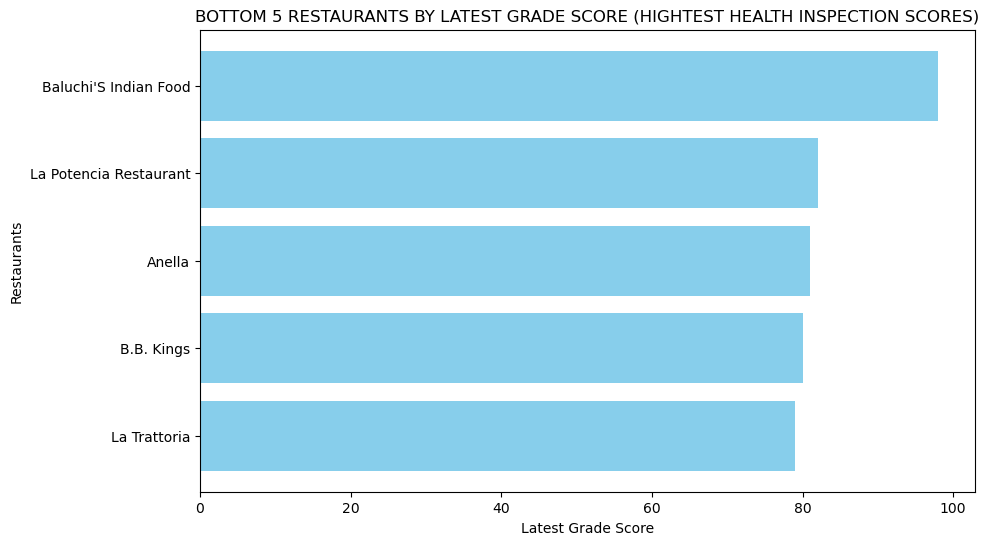

In [3]:
def visualize_bottom_n_restaurants_by_latest_grade(api, n=5):
    '''
    Visualizes the bottom N restaurants in terms of health by their latest grade score using a horizontal bar chart.


    Parameters:
    - api (RestaurantDataAPI): An instance of the RestaurantDataAPI class used to perform database operations.
    - n (int): The number of top restaurants to retrieve and display. Defaults to 5.

    Returns:
    - None: This function directly displays the bar chart and does not return any value.
    '''

    # Retrieve data for the top N restaurants by latest grade score
    data = api.bottom_n_restaurants_by_latest_inspection_score(n)
    
    # Extract restaurant names and their corresponding latest grade scores
    restaurants = [item['name'] for item in data]
    scores = [item['latestGrade']['score'] for item in data]

    # Set up the plot
    plt.figure(figsize=(10, 6))
    plt.barh(restaurants[::-1], scores[::-1], color='skyblue')
    
    # Setting the chart title and labels
    plt.xlabel('Latest Grade Score')
    plt.ylabel('Restaurants')
    plt.title(f'BOTTOM {n} RESTAURANTS BY LATEST GRADE SCORE (HIGHTEST HEALTH INSPECTION SCORES)')
    
    # Display the plot
    plt.show()

    
    
    
# Call the function to visualize the top 5 restaurants by latest grade score
visualize_bottom_n_restaurants_by_latest_grade(api, 5)


### Comparative Analysis of Top 20 Cuisines


The visualization provides a sorted horizontal bar chart showcasing the top 20 cuisines by their average health inspection scores, with each bar representing a different cuisine and its average score colored in salmon. The arrangement ensures that cuisines are ordered by their health scores, offering a clear comparison of sanitary performance across various culinary traditions.

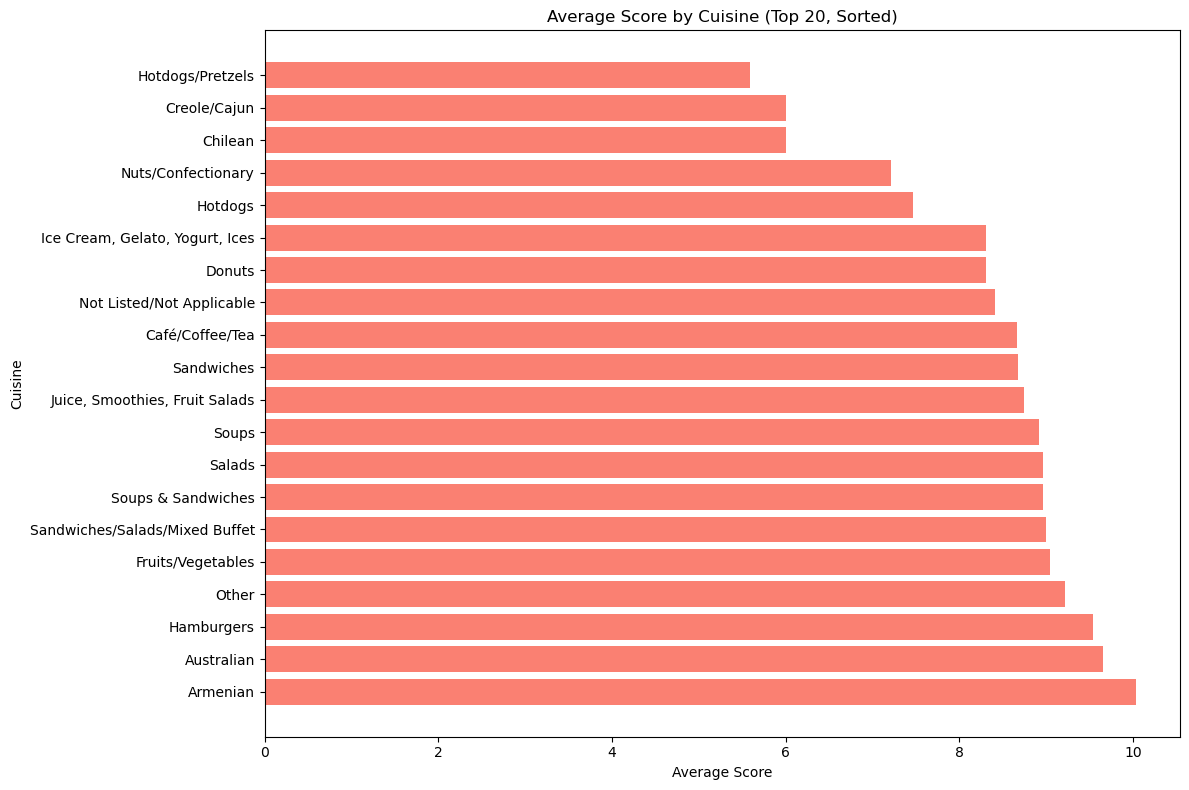

In [4]:
def visualize_average_score_by_cuisine(api):
    '''
    Visualizes the average grade score by cuisine using a horizontal bar chart, focusing on the top 20 cuisines with the lowest average scores.

    This function retrieves the average grade scores for each cuisine from the database, then sorts these scores in ascending order to identify
    cuisines with lower health inspection scores. It generates a horizontal bar chart to display the top 20 cuisines with the lowest average scores,
    providing insights into which cuisines, on average, have room for improvement in terms of health inspection results.

    Parameters:
    - api (RestaurantDataAPI): An instance of the RestaurantDataAPI class used to perform database operations.

    Returns:
    - None: This function directly displays the bar chart and does not return any value.
    '''
    
    # Retrieve data on the average score by cuisine
    data = api.average_score_by_cuisine()
    
    # Sort the cuisines by average score in ascending order to highlight those with lower scores
    sorted_data = sorted([item for item in data if item['_id'] is not None], key=lambda x: x['averageScore'])
    
    # Extract the cuisine names and their average scores from the sorted data
    cuisines = [item['_id'] for item in sorted_data]
    average_scores = [item['averageScore'] for item in sorted_data]

    # Set up the plot for the top 20 cuisines with the lowest average scores
    plt.figure(figsize=(12, 8))
    plt.barh(cuisines[:20][::-1], average_scores[:20][::-1], color='salmon')
    
    # Setting the chart title and labels
    plt.xlabel('Average Score')
    plt.ylabel('Cuisine')
    plt.title('Average Score by Cuisine (Top 20, Sorted)')
    
    # Adjust layout for better display
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    
# Call the function to visualize the average score by cuisine for the top 20 cuisines with the lowest scores
visualize_average_score_by_cuisine(api)

### Spatial Distribution of Restaurants Across Selected Geographical Areas



The visualization displays a bar chart comparing the number of restaurants located within three distinct geographical areas, with each bar color-coded to represent a different area. The chart effectively illustrates the distribution of restaurants, providing insights into which areas have higher or lower concentrations of dining options.

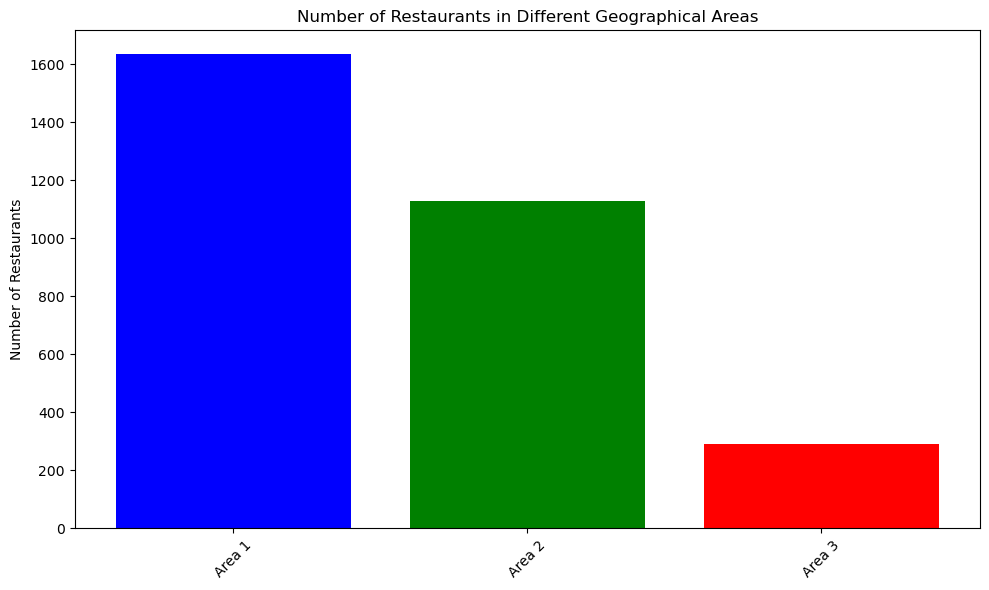

In [5]:
def visualize_restaurants_in_multiple_geo_areas(api, polygons, area_names):
    '''
    Visualizes the number of restaurants located in specified geographical areas using a bar chart.

    This function takes a list of polygons defining geographical areas and corresponding names for these areas.
    It queries the database for restaurants located within each polygon and then generates a bar chart to visualize
    the count of restaurants in each area. The visualization helps in comparing the density of restaurants across
    different geographical locations.

    Parameters:
    - api (RestaurantDataAPI): An instance of the RestaurantDataAPI class used to perform database operations.
    - polygons (list of lists): A list where each element is a list of coordinates defining a polygonal area.
    - area_names (list of str): A list of names corresponding to each polygonal area, used as labels in the visualization.

    Returns:
    - None: This function directly displays the bar chart and does not return any value.
    '''
    
    # Initialize a list to store the count of restaurants in each geographical area
    counts = []
    
    # Loop through each polygon and query the database for restaurants within it
    for polygon in polygons:
        restaurants = api.find_restaurants_in_geo_area(polygon)
        counts.append(len(restaurants))

    # Set up the plot
    plt.figure(figsize=(10, 6))
    plt.bar(area_names, counts, color=['blue', 'green', 'red', 'yellow', 'purple'])
    
    # Setting the chart title and labels
    plt.title('Number of Restaurants in Different Geographical Areas')
    plt.ylabel('Number of Restaurants')
    plt.xticks(rotation=45)
    
    # Adjust layout for better display
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    
    
# Define area names and polygons
area_names = ['Area 1', 'Area 2', 'Area 3'] 
polygons = [
        [[-74.0, 40.73], [-73.96, 40.73], [-73.96, 40.75], [-74.0, 40.75], [-74.0, 40.73]],  # Area 1
        [[-73.99, 40.73], [-73.95, 40.73], [-73.95, 40.75], [-73.99, 40.75], [-73.99, 40.73]],  # Area 2
        [[-73.932, 40.764], [-73.932, 40.778], [-73.904, 40.778], [-73.904, 40.764], [-73.932, 40.764]],  # Area 3
        ]


# Visualize the number of restaurants in specified geographical areas
visualize_restaurants_in_multiple_geo_areas(api, polygons, area_names)

### Score Distribution for Restaurants Below a Threshold Score


The visualization presents a histogram depicting the distribution of health inspection scores below a threshold of 10 for restaurants, with each bin representing a score and its frequency colored in red. This chart highlights how many restaurants fall within each lower score bracket, indicating areas of concern regarding health and safety standards.

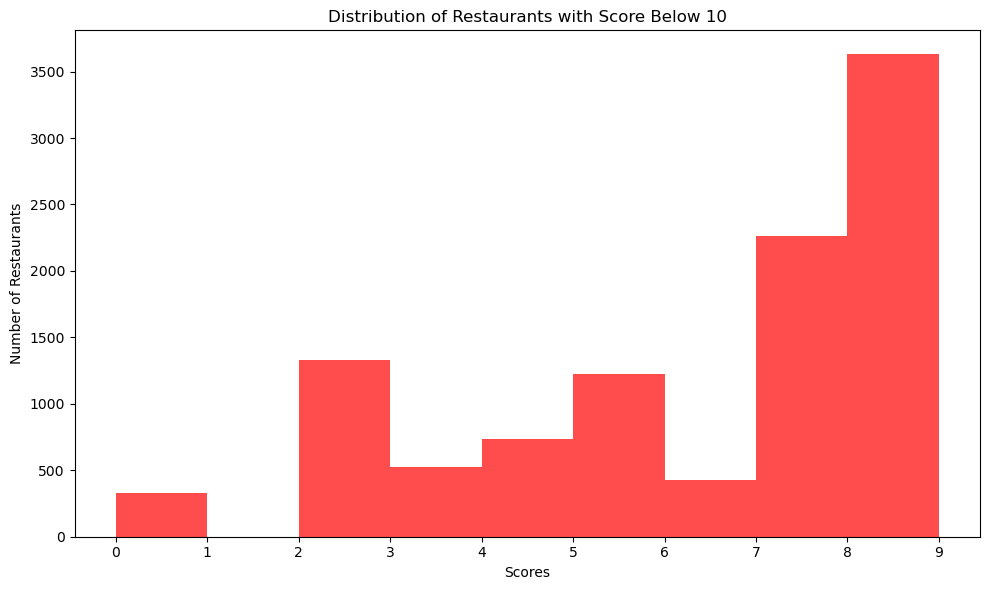

In [6]:
def visualize_restaurants_with_low_score(api, score_threshold=10):
    '''
    Visualizes the distribution of health inspection scores for restaurants with scores below a specified threshold using a histogram.

    This function queries the database for restaurants with health inspection scores below the specified threshold. It then generates a histogram to visualize the distribution of these low scores among the restaurants, providing insights into how many restaurants are close to or far from the threshold.

    Parameters:
    - api (RestaurantDataAPI): An instance of the RestaurantDataAPI class used to perform database operations.
    - score_threshold (int): The score threshold below which the restaurants will be considered. Defaults to 10.

    Returns:
    - None: This function directly displays the histogram and does not return any value.
    '''

    # Retrieve data for restaurants with scores below the specified threshold
    low_score_restaurants = api.find_restaurants_with_low_score(score_threshold)
    
    # Extract scores from the first grade entry for each restaurant
    scores = [restaurant['grades'][0]['score'] for restaurant in low_score_restaurants]

    # Set up the histogram plot
    plt.figure(figsize=(10, 6))
    plt.hist(scores, bins=range(score_threshold), color='red', alpha=0.7)
    
    # Setting the chart title and labels
    plt.xlabel('Scores')
    plt.ylabel('Number of Restaurants')
    plt.title(f'Distribution of Restaurants with Score Below {score_threshold}')
    
    # Setting the x-ticks to represent each possible score up to the threshold
    plt.xticks(range(score_threshold))
    
    # Adjust layout for better display
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
# visualize the distribution of scores for restaurants with low health inspection scores  
visualize_restaurants_with_low_score(api, score_threshold=10)

<Figure size 1200x600 with 0 Axes>

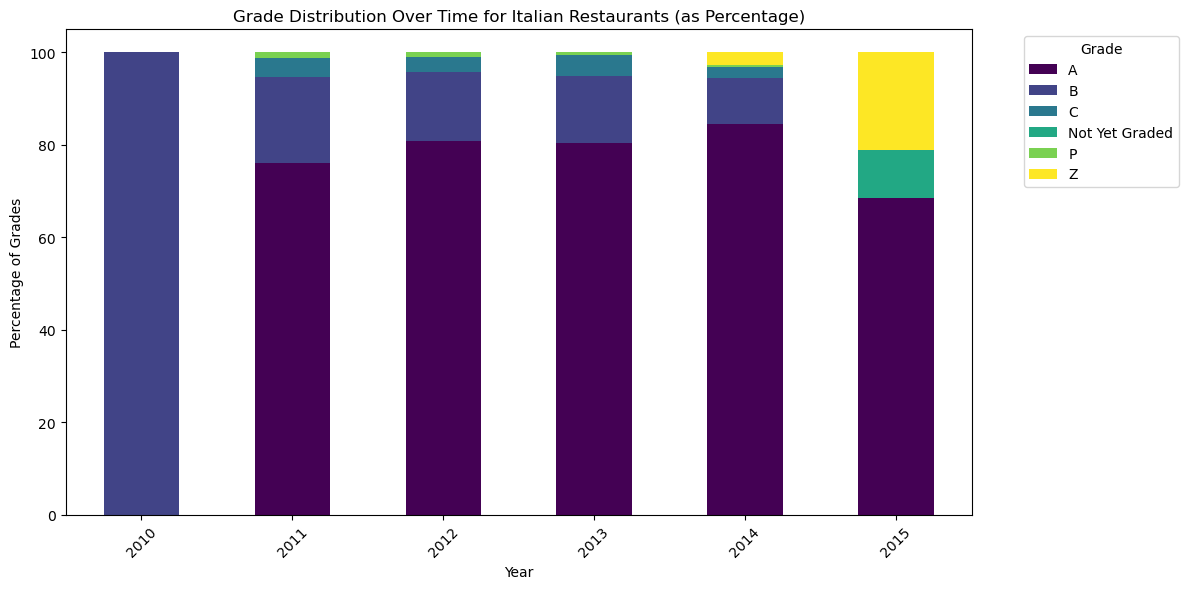

In [7]:
def visualize_grade_distribution_over_time_as_percentage(api, cuisine='Italian'):
    '''
    Visualizes the distribution of health inspection grades over time as a percentage for a specific cuisine.

    This function retrieves health inspection grade data for restaurants of a specified cuisine, then calculates and visualizes
    the distribution of these grades over time. The grades are shown as percentages of the total grades given each year, providing
    insights into how the health inspection outcomes for restaurants of the specified cuisine have evolved.

    Parameters:
    - api (RestaurantDataAPI): An instance of the RestaurantDataAPI class used to perform database operations.
    - cuisine (str): The type of cuisine to filter the restaurants by. Defaults to 'Italian'.

    Returns:
    - None: This function directly displays a stacked bar chart and does not return any value.
    '''
    
    # Fetch restaurants data for the specified cuisine
    restaurants = api.find_restaurants_sorted_by_cuisine(cuisine)
    
    # Flatten the grades data to a list of dictionaries
    grades_data = []
    for restaurant in restaurants:
        for grade in restaurant['grades']:
            # Convert MongoDB's timestamp format to a datetime object
            grade_date = datetime.utcfromtimestamp(grade['date']['$date'] / 1000)
            grades_data.append({'name': restaurant['name'], 'date': grade_date, 'grade': grade['grade']})
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(grades_data)
    
    # Extract the year from each date and group data by year and grade
    df['year'] = df['date'].dt.year
    grade_distribution = df.groupby(['year', 'grade']).size().unstack(fill_value=0)
    
    # Convert the counts to percentages of the total for each year
    grade_percentage = grade_distribution.div(grade_distribution.sum(axis=1), axis=0) * 100
    
    # Set up and display the plot
    plt.figure(figsize=(12, 6))
    grade_percentage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
    plt.title(f'Grade Distribution Over Time for {cuisine} Restaurants (as Percentage)')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Grades')
    plt.xticks(rotation=45)
    plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    

# Visualize the grade distribution over time for Italian restaurants    
visualize_grade_distribution_over_time_as_percentage(api, cuisine='Italian')

# Interpretation

The first bar chart reveals that Manhattan has the highest concentration of restaurants, significantly surpassing the numbers in Brooklyn, Queens, the Bronx, and Staten Island, with a small subset of data missing borough information. The second horizontal bar chart, labeled "BOTTOM 5 RESTAURANTS BY LATEST GRADE SCORE (HIGHEST HEALTH INSPECTION SCORES)," lists restaurants with the highest health inspection scores, indicative of more health violations, with 'Baluchi's Indian Food' recording the highest score recently and suggesting a need for significant improvement. The third chart, "Average Score by Cuisine (Top 20, Sorted)," displays the average health inspection scores for the top 20 cuisines with the best records, where categories like 'Hotdogs/Pretzels' and 'Chilean' boast the lowest average scores, indicating better compliance with health regulations. The fourth chart, "Number of Restaurants in Different Geographical Areas," uses color-coded bars to compare the number of restaurants across three distinct areas, with Area 1 hosting the most establishments, followed by Area 2, and Area 3 with the fewest. The fifth chart, "Distribution of Restaurants with Score Below 10," presents a histogram of health inspection scores below 10. This chart mainly shows a bimodal distribution with peaks at scores of 3 and 8, implying that only a few restaurants are exceptionally healthy (with scores of 0-2). The sixth chart, "Grade Distribution Over Time for Italian Restaurants (as Percentage)," illustrates a stacked bar chart over five years, displaying the proportion of grades assigned to Italian restaurants. Recently, the grade 'A' has become much more predominant, indicating a generally higher standard of health compliance, but there has been an increase in 'P' and 'Z' grades, which may be due to typographical errors or changes in the grading standards